<a href="https://colab.research.google.com/github/castorhyun/DeepLearningZeroToAll/blob/master/fund_prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/0011.데이터모델링/Data_2017

/content/gdrive/My Drive/Colab Notebooks/0011.데이터모델링/Data_2017


라이브러리 import


In [0]:
import pandas as pd


In [0]:
data_in = pd.read_csv("cvt_201701.csv")
data_in = pd.concat([data_in, pd.read_csv("cvt_201702.csv")], ignore_index=True)

In [5]:
data_in.head()

,sno,age,postno,trxMM,sincdt,early_cnt,mid_cnt,late_cnt,resv_amt,cnt,A0_cnt,C0_cnt,CK_cnt,D0_cnt,DT_cnt,G0_cnt,jibul_psb_jan,jan,bfmm_ac_jan,m_avjn,bfmm_ac_avjn,lm3_ac_avjn,lm6_ac_avjn,lm12_ac_avjn,jibul_psb_jan_1,jan_1,bfmm_ac_jan_1,m_avjn_1,bfmm_ac_avjn_1,lm3_ac_avjn_1,lm6_ac_avjn_1,lm12_ac_avjn_1
0,2577,48,28696,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16996,1704570,207356,254474,401483,290049,351430,273399
1,5214,42,11776,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2756388,1936892,1858233,3805573,3518152,3712840,4123438,4393251
2,6559,25,21988,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3217980,831151,1191239,416157,746375,1261631,730455
3,7694,55,28511,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16954023,7817629,8348041,6587579,8024913,7208232,7328595,7848239
4,6376,44,42908,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3109041,126702,188095,248065,265718,442455,523083,417348


In [6]:
from tqdm import tqdm

# 각 거래채널별 거래건수를 합산 - 거래가 있는 경우 1 , 없으면 0
trx_cnt = list(data_in['A0_cnt'] + data_in['C0_cnt'] + data_in['CK_cnt'] + data_in['D0_cnt'] + data_in['DT_cnt'] + data_in['G0_cnt'])

ip_yn = []

for i in tqdm(range(len(trx_cnt))):
  if trx_cnt[i] > 0:
    ip_yn.append(1)
  else:
    ip_yn.append(0)


data_in['ip_yn'] = ip_yn

100%|██████████| 763312/763312 [00:00<00:00, 2292044.81it/s]


In [0]:
trx_df = data_in[data_in['ip_yn'] == 1]
notrx_df = data_in[data_in['ip_yn'] == 0]

In [0]:
# 학습데이터 비율 조정
# 입금거래데이터 50,948
# 비입금데이터 71만건

filt_notrx_df = notrx_df.iloc[0:50948]

new_train_data = pd.concat([trx_df, filt_notrx_df])
new_train_data = new_train_data.sort_values(by=['sno'], axis=0, ascending=True)



In [9]:
new_train_data

,sno,age,postno,trxMM,sincdt,early_cnt,mid_cnt,late_cnt,resv_amt,cnt,A0_cnt,C0_cnt,CK_cnt,D0_cnt,DT_cnt,G0_cnt,jibul_psb_jan,jan,bfmm_ac_jan,m_avjn,bfmm_ac_avjn,lm3_ac_avjn,lm6_ac_avjn,lm12_ac_avjn,jibul_psb_jan_1,jan_1,bfmm_ac_jan_1,m_avjn_1,bfmm_ac_avjn_1,lm3_ac_avjn_1,lm6_ac_avjn_1,lm12_ac_avjn_1,ip_yn
42085,0,53,3941,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117630,0,0,0,0,0,75333,37872,0
625705,0,49,6920,201702,20170227,2,0,0,3000000,2,0,0,0,2,0,0,-26435126,0,1354507,595998,17434337,6768282,4561905,3012896,-26435126,0,1354507,595998,17434337,6768282,4561905,3012896,1
626634,0,32,14016,201702,20170213,2,0,0,433000,2,0,0,0,0,2,0,0,32780,5068052,361470,891181,506433,690512,656198,0,32780,5068052,361470,891181,506433,690512,656198,1
523687,0,32,14016,201702,20170213,2,0,0,463000,2,0,0,0,0,2,0,0,32780,5068052,361470,891181,506433,690512,656198,0,32780,5068052,361470,891181,506433,690512,656198,1
5868,0,65,21357,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1932493,1940983,1938518,1406293,1418835,918979,945847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741749,9999,51,18440,201702,20170217,1,0,0,100000,1,1,0,0,0,0,0,0,6267341,0,302407,0,94082,46781,23198,0,6267341,0,302407,0,94082,46781,23198,1
10307,9999,24,7524,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400069,176096,627632,586626,603465,557097,896967,0
218678,9999,10,6514,201701,20170126,1,0,0,210000,1,1,0,0,0,0,0,0,100345,200318,119676,109983,111177,73669,39287,0,100345,200318,119676,109983,111177,73669,39287,1
379621,9999,28,14663,201701,20170126,2,0,0,1000000,2,0,0,0,0,2,0,15308,486185,91460,158160,146247,117977,101311,177744,15308,486185,91460,158160,146247,117977,101311,177744,1


In [0]:
# 학습데이터 만들기 ver.1
# 전체데이터 

x_train = pd.DataFrame()
y_train = pd.DataFrame()


x_train['jibul_psb_jan_1'] = data_in['jibul_psb_jan_1']
x_train['jan_1'] = data_in['jan_1']
x_train['bfmm_ac_jan_1'] = data_in['bfmm_ac_jan_1']
x_train['m_avjn_1'] = data_in['m_avjn_1']
x_train['bfmm_ac_avjn_1'] = data_in['bfmm_ac_avjn_1']
x_train['lm3_ac_avjn'] = data_in['lm3_ac_avjn_1']


y_train = data_in['cnt']

In [0]:
# 학습데이터 만들기 ver.2
# 입금데이터 건수 줄이기

x_train = pd.DataFrame()
y_train = pd.DataFrame()

x_train['jibul_psb_jan_1'] = new_train_data['jibul_psb_jan_1']
x_train['jan_1'] = new_train_data['jan_1']
x_train['bfmm_ac_jan_1'] = new_train_data['bfmm_ac_jan_1']
x_train['m_avjn_1'] = new_train_data['m_avjn_1']
x_train['bfmm_ac_avjn_1'] = new_train_data['bfmm_ac_avjn_1']
x_train['lm3_ac_avjn'] = new_train_data['lm3_ac_avjn_1']


y_train = new_train_data['ip_yn']

In [11]:
y_train.value_counts()

1    50948
0    50948
Name: ip_yn, dtype: int64

In [12]:
x_train

,jibul_psb_jan_1,jan_1,bfmm_ac_jan_1,m_avjn_1,bfmm_ac_avjn_1,lm3_ac_avjn
42085,117630,0,0,0,0,0
625705,-26435126,0,1354507,595998,17434337,6768282
626634,0,32780,5068052,361470,891181,506433
523687,0,32780,5068052,361470,891181,506433
5868,0,1932493,1940983,1938518,1406293,1418835
...,...,...,...,...,...,...
741749,0,6267341,0,302407,0,94082
10307,0,400069,176096,627632,586626,603465
218678,0,100345,200318,119676,109983,111177
379621,15308,486185,91460,158160,146247,117977


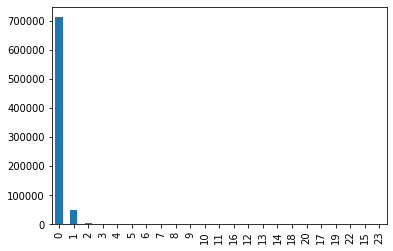

In [0]:
# 데이터 라벨 분포 확인해보기
data_in['cnt'].value_counts().plot(kind='bar')

In [0]:
data_val = data_in[data_in['lm3_ac_avjn'] > 0]
data_val['ip_yn'].value_counts()

1    89292
Name: ip_yn, dtype: int64

In [0]:
trx_cnt = list(data_in['cnt'])

In [0]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

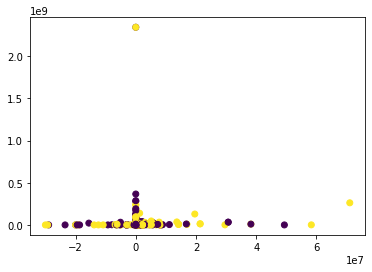

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
#plot_x = x_train_np[:,0]
#plot_y = x_train_np[:,1]
#plot_color = y_train_np.reshape(381656,)

plot_x = x_train_np[:1000,0]
plot_y = x_train_np[:1000,1]
plot_color = y_train_np[:1000].reshape(1000,)


plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

모델 학습하기


In [14]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 





Using TensorFlow backend.


In [0]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [21]:

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(10, input_dim=6, activation='sigmoid'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score])


# 4. 모델 학습시키기
hist = model.fit(x_train_np, y_train_np, epochs=7, batch_size=64,validation_split=0.2)

Train on 81516 samples, validate on 20380 samples
Epoch 1/7
81516/81516 [==============================] - 2s 23us/step - loss: 2.9273 - accuracy: 0.4910 - precision: 0.5526 - recall: 0.3717 - f1score: 0.4212 - val_loss: 0.9222 - val_accuracy: 0.5528 - val_precision: 0.5651 - val_recall: 0.4858 - val_f1score: 0.5130
Epoch 2/7
81516/81516 [==============================] - 2s 24us/step - loss: 0.7537 - accuracy: 0.5504 - precision: 0.5498 - recall: 0.5640 - f1score: 0.5505 - val_loss: 0.6834 - val_accuracy: 0.5663 - val_precision: 0.5858 - val_recall: 0.4842 - val_f1score: 0.5209
Epoch 3/7
81516/81516 [==============================] - 2s 25us/step - loss: 0.6846 - accuracy: 0.5523 - precision: 0.5491 - recall: 0.5925 - f1score: 0.5639 - val_loss: 0.6803 - val_accuracy: 0.5577 - val_precision: 0.5520 - val_recall: 0.6614 - val_f1score: 0.5939
Epoch 4/7
81516/81516 [==============================] - 2s 25us/step - loss: 0.6822 - accuracy: 0.5531 - precision: 0.5481 - recall: 0.6014 - f1s

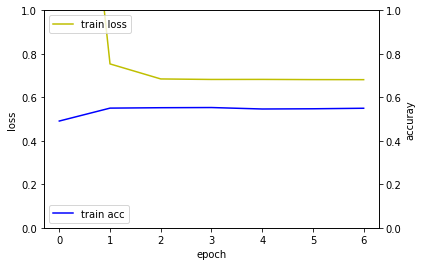

In [26]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
# 평가데이터 만들기

data_eval = pd.read_csv('cvt_201703.csv')

from tqdm import tqdm

# 각 거래채널별 거래건수를 합산 - 거래가 있는 경우 1 , 없으면 0
trx_cnt = list(data_eval['A0_cnt'] + data_eval['C0_cnt'] + data_eval['CK_cnt'] + data_eval['D0_cnt'] + data_eval['DT_cnt'] + data_eval['G0_cnt'])

ip_yn = []

for i in tqdm(range(len(trx_cnt))):
  if trx_cnt[i] > 0:
    ip_yn.append(1)
  else:
    ip_yn.append(0)


data_eval['ip_yn'] = ip_yn

100%|██████████| 381656/381656 [00:00<00:00, 2095263.47it/s]


In [0]:

x_test = pd.DataFrame()
y_test = pd.DataFrame()

x_test['jibul_psb_jan_1'] = data_eval['jibul_psb_jan_1']
x_test['jan_1'] = data_eval['jan_1']
x_test['bfmm_ac_jan_1'] = data_eval['bfmm_ac_jan_1']
x_test['m_avjn_1'] = data_eval['m_avjn_1']
x_test['bfmm_ac_avjn_1'] = data_eval['bfmm_ac_avjn_1']
x_test['lm3_ac_avjn'] = data_eval['lm3_ac_avjn_1']


y_test = data_eval['ip_yn']


x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()


In [24]:
# 학습모델 평가하기

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test_np, y_test_np, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))





381656/381656 [==============================] - 8s 20us/step
loss_and_metrics : [0.6552265099649331, 0.6420729756355286, 0.1078149825334549, 0.4316401779651642, 0.16440097987651825]


In [0]:
# 7. 모델 예측값 만들기
mypredict = model.predict(x_test_np)

my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i])

sub_dict = {"result":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("20200614_MLP_result1.csv", index=False, encoding='utf-8')
